In [1]:
# This code is for simulation polarimetric calibration, after correction for in-homogeneity.

import cv2
import polanalyser as pa
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from mpldatacursor import datacursor

In [6]:
#Simulate groud truth normalized Stokes Vector
DoLP_True = 0.999
I_source = 1
t_guess = 0.5
q_true = np.ones([37,200,200])
u_true = np.ones([37,200,200])
count =0

for AoLP_true in range (0,185,5):
    q_true[count,:,:] = DoLP_True*np.cos(2*np.deg2rad(AoLP_true))
    u_true[count,:,:] = DoLP_True*np.sin(2*np.deg2rad(AoLP_true))
    count = count+1

In [7]:
#Simulate mono images, no demosaicing
alpha = np.ones([37,200,200])
alpha[:,1::2, 1::2]=  0
alpha[:,0::2, 1::2]=  45
alpha[:,0::2, 0::2]=  90
alpha[:,1::2, 0::2]=  135
L = 0.5*t_guess*(I_source+ q_true*np.cos(2*np.deg2rad(alpha))+u_true*np.sin(2*np.deg2rad(alpha)))
noise_std = 5
noise =  np.random.normal(0.0,noise_std/100,L.shape)
L_noise = L*(1+noise)

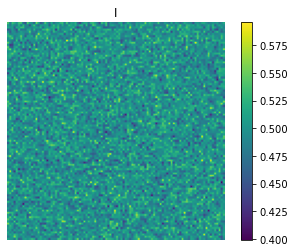

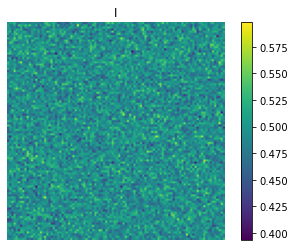

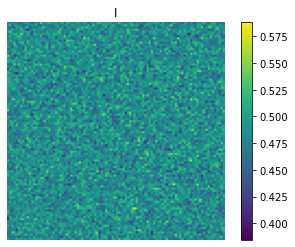

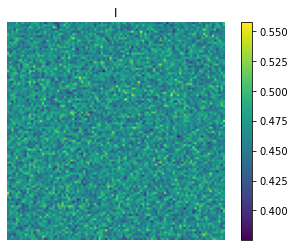

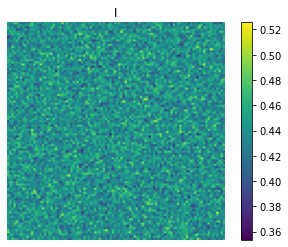

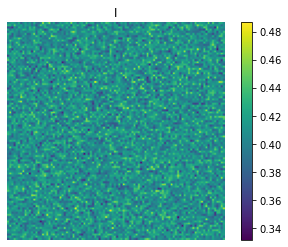

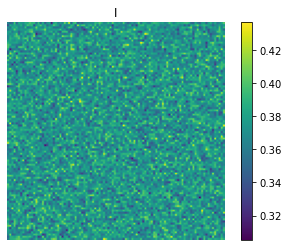

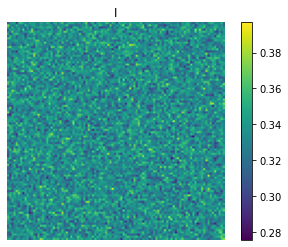

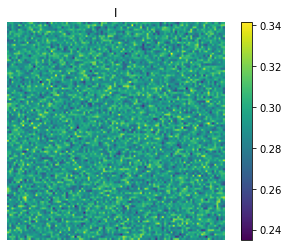

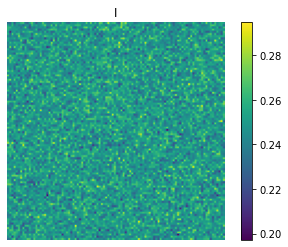

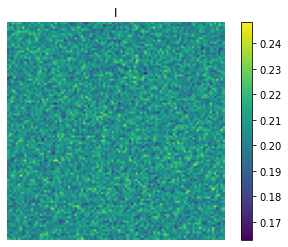

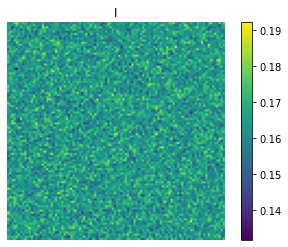

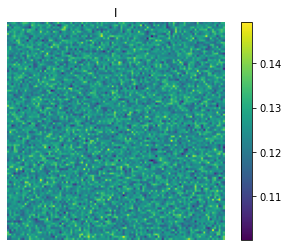

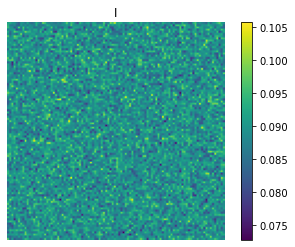

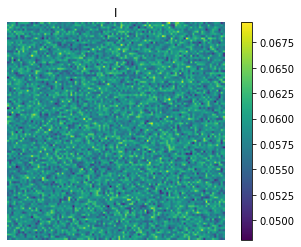

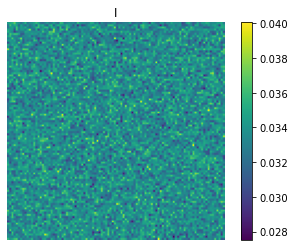

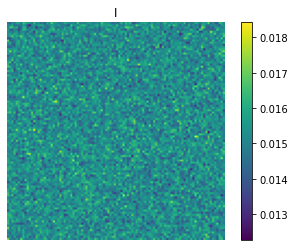

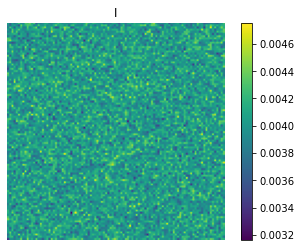

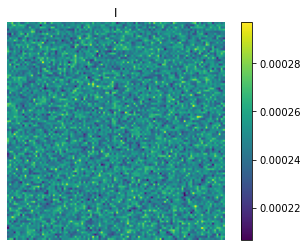

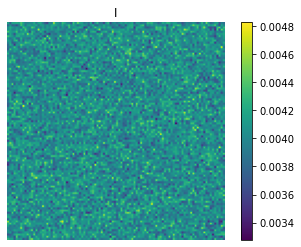

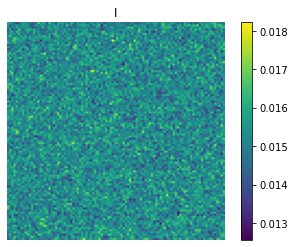

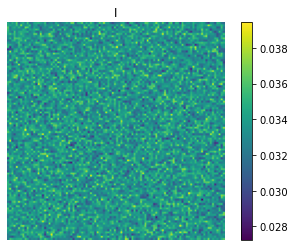

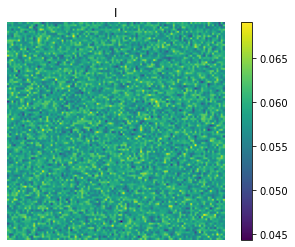

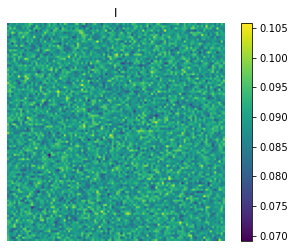

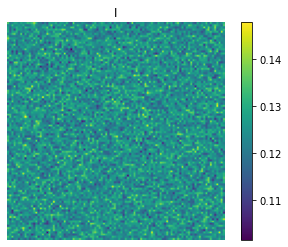

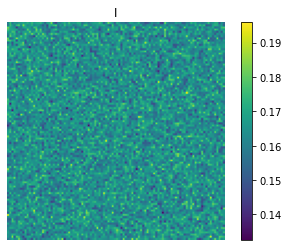

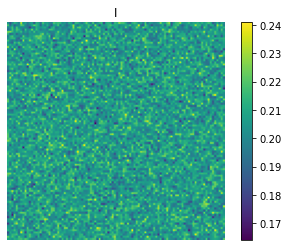

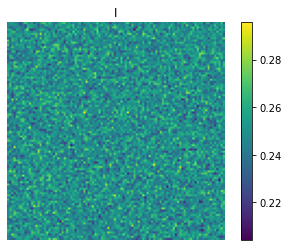

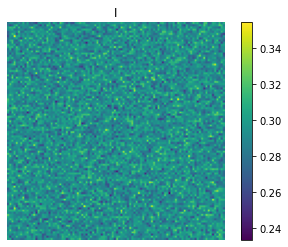

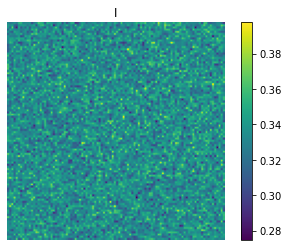

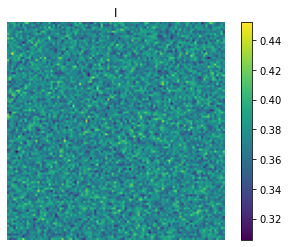

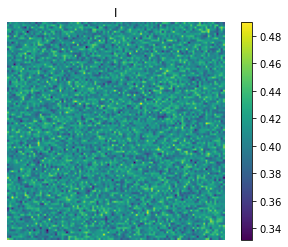

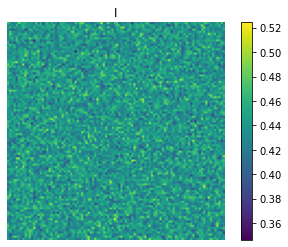

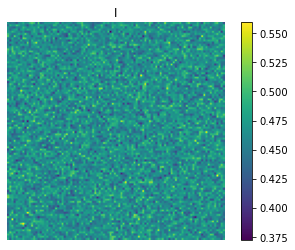

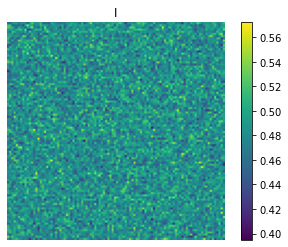

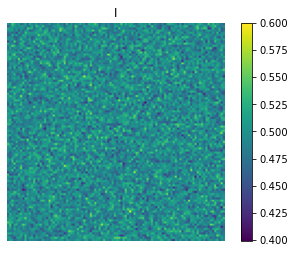

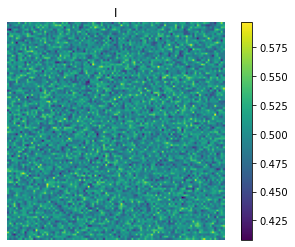

In [9]:
#Show noisy images
for i in range(count):
    plt.figure(1)
    im1 = plt.imshow(L_noise[i,1::2, 1::2])
    plt.colorbar(im1)
    datacursor()
    plt.title('I')
    plt.axis('off')
    plt.show()